In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
Modified_plant = pd.read_csv('Modified_plant.csv')
Y = Modified_plant['c241']
X = Modified_plant
X.drop('c241', axis=1, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

Y = Y.apply(pd.to_numeric, errors='coerce')
X.fillna(0.00, inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

mlr_model1 = sm.OLS(Y_train, X_train).fit()


# Function to eliminate parameters one by one based on p-value
def backward_elimination(model, X, Y):
    while model.pvalues.max() > 0.05:
        # Find the parameter with the highest p-value
        max_pvalue_idx = model.pvalues.idxmax()

        # Drop the parameter with the highest p-value from the feature matrix
        X = X.drop(max_pvalue_idx, axis=1)

        # Fit a new model without the eliminated parameter
        model = sm.OLS(Y,X).fit()

    return model, X

# Perform backward elimination
final_model, final_X = backward_elimination(mlr_model1, X, Y)
final_X_test = X_test[final_X.columns]
# Display the summary of the final model
print(final_model.summary())

columns = []
for column in final_X.columns :
    columns.append(column)


print(columns)

                            OLS Regression Results                            
Dep. Variable:                   c241   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.016e+04
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:26:25   Log-Likelihood:                 2477.3
No. Observations:                1025   AIC:                            -4745.
Df Residuals:                     920   BIC:                            -4227.
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c5             0.0202      0.005      3.935      0.0

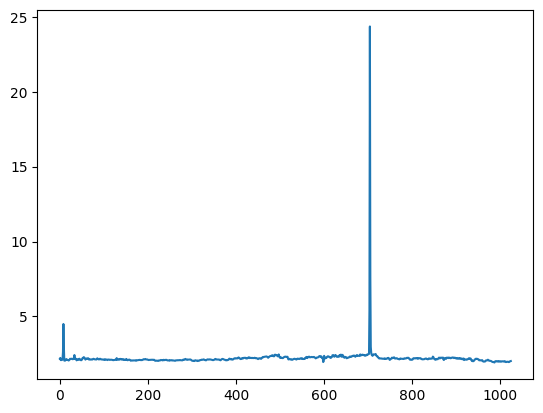

In [4]:
y_predicted = final_model.predict(final_X)
plt.plot(Y)
plt.show()

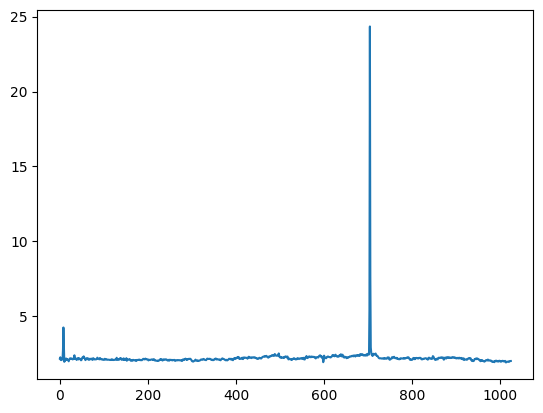

In [5]:
plt.plot(y_predicted)
plt.show()

In [6]:
Predict = []
Control = []
for column in final_X.columns :
#     plt.plot(final_X[column])
#     plt.show()
#     print(final_X[column].var())
    if final_X[column].std() < 0.065*final_X[column].mean() :
#         print('controllable')
        Control.append(column)
    else :
        Predict.append(column)
print(Predict)
print(Control)

final_parameters = []
for column in final_X.columns :
    if column not in ['c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c39', 'c139', 'c142', 'c143', 'c155', 'c156', 'c157', 'c158', 'c160', 'c161', 'c162', 'c163'] :
        final_parameters.append(column)
        
print(final_parameters)

['c5', 'c6', 'c7', 'c9', 'c17', 'c28', 'c37', 'c39', 'c42', 'c43', 'c45', 'c46', 'c52', 'c53', 'c55', 'c70', 'c89', 'c96', 'c97', 'c102', 'c113', 'c118', 'c137', 'c144', 'c149', 'c127', 'c130', 'c150', 'c153', 'c159', 'c160', 'c161', 'c162', 'c181', 'c184', 'c191', 'c197', 'c214', 'c221']
['c8', 'c11', 'c13', 'c16', 'c26', 'c29', 'c31', 'c32', 'c38', 'c41', 'c48', 'c50', 'c58', 'c62', 'c63', 'c67', 'c69', 'c75', 'c78', 'c79', 'c80', 'c81', 'c86', 'c87', 'c88', 'c90', 'c91', 'c92', 'c93', 'c95', 'c99', 'c100', 'c101', 'c103', 'c105', 'c107', 'c108', 'c112', 'c119', 'c123', 'c135', 'c140', 'c141', 'c148', 'c152', 'c176', 'c178', 'c179', 'c187', 'c192', 'c194', 'c195', 'c196', 'c198', 'c201', 'c203', 'c205', 'c206', 'c212', 'c213', 'c215', 'c216', 'c222', 'c224', 'c225', 'c231', 'c232']
['c5', 'c6', 'c7', 'c8', 'c9', 'c11', 'c13', 'c16', 'c17', 'c37', 'c38', 'c41', 'c42', 'c43', 'c45', 'c46', 'c48', 'c50', 'c52', 'c53', 'c55', 'c58', 'c62', 'c63', 'c67', 'c69', 'c70', 'c75', 'c78', 'c79',

In [7]:
X_predict = final_X[
['c5', 'c6', 'c7', 'c9', 'c17', 'c28', 
                     'c37', 'c39', 'c42', 'c43', 'c45', 'c46', 'c52', 'c53', 'c55', 'c70', 'c89', 'c96', 'c97', 'c102', 'c113', 'c118', 'c137', 'c144', 'c149', 'c127', 'c130', 'c150', 
                     'c153', 'c159', 'c160', 'c161', 'c162', 'c181', 'c184', 'c191', 'c197', 'c214', 'c221']]
X_predict_train, X_predict_test, Y_predict_train, Y_predict_test = train_test_split(X_predict, Y, test_size=0.2, random_state=42)
predict_model = sm.OLS(Y_predict_train, X_predict_train).fit()
final_predict_model, final_predict_X = backward_elimination(predict_model, X_predict, Y)
print(final_predict_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   c241   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              4585.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):                        0.00
Time:                        23:26:25   Log-Likelihood:                          171.61
No. Observations:                1025   AIC:                                     -287.2
Df Residuals:                     997   BIC:                                     -149.1
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------